In [2]:
%matplotlib inline

                                   uranus                model                ratio
                mass            14.525969            14.525969             1.000000
              radius           2.5362e+09          2.49668e+09             1.015831
               gsurf           900.760174           929.505337             0.969075



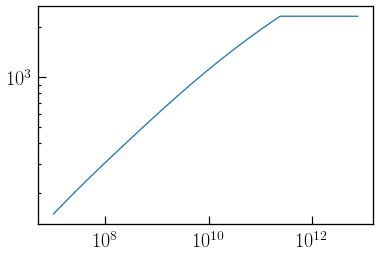

In [62]:
'''rough static model for present-day uranus'''

import ongp; reload(ongp) # reload to catch any changes to the module

mu = const.uranus_mass / const.mearth # 14.5
ru = const.uranus_rvol
gu = (const.cgrav * const.uranus_mass / const.uranus_rvol ** 2)

f = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')
f.static(mtot='u', mcore=13, zenv=0.1, t10=150.)

'''the large `core' mass means H/He envelope extends only to relatively low pressures
(e.g., p ~ 0.1 Mbar) which seems necessary to avoid going off the scvh tables
by being too cold at P > 11.4 Mbar. this issue usually manifests as nans in grada.'''


print '%20s %20s %20s %20s' % ('', 'uranus', 'model', 'ratio')
print '%20s %20f %20f %20f' % ('mass', mu, f.mtot / const.mearth, mu / f.mtot * const.mearth)
print '%20s %20g %20g %20f' % ('radius', ru, f.rtot, ru / f.rtot)
print '%20s %20f %20f %20f' % ('gsurf', gu, f.surface_g, gu / f.surface_g)
print 

plt.loglog(f.p, f.t)


512 2502793704.32 0.986828209258
1024 2496675746.87 0.984415955709
2048 2493805855.02 0.983284384126
4096 2492420716.54 0.982738236945
8192 2491741070.87 0.982470258999
16384 2491419815.31 0.982343590926


Text(0,0.5,'$\\rho\\ (\\rm g\\ cm^{-3})$')

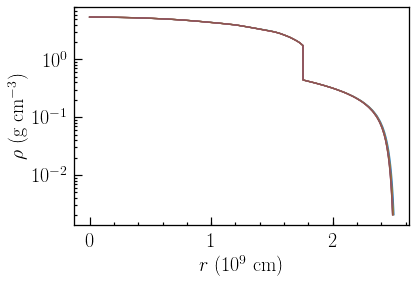

In [6]:
'''a quick spatial resolution test for the static uranus'''
import ongp
reload(ongp)
for nz in (512, 1024, 2048, 4096, 8192, 16384):
    u = ongp.evol(nz=nz, z_eos_option='reos water', atm_option='f11_tables u')
    u.static(mtot='u', mcore=13., zenv=0.1, t10=150.)

    plt.semilogy(u.r * 1e-9, u.rho)
    print nz, u.rtot, u.rtot / const.uranus_rvol
    
plt.xlabel(r'$r\ (10^9\ {\rm cm})$')
plt.ylabel(r'$\rho\ (\rm g\ cm^{-3})$')

840.0 181.71604445
150.0 59.3555192211


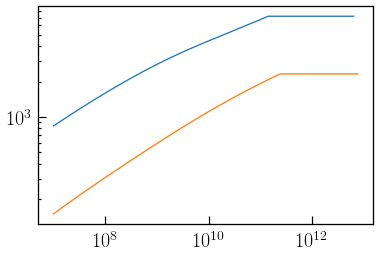

In [9]:
''' before try to evolve, verify that starting / ending t10s give calculable static models'''

u = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')

u.static(mtot='u', mcore=13., zenv=0.1, t10=840.)
print u.t10, u.teff
plt.loglog(u.p, u.t)

u.static(mtot='u', mcore=13., zenv=0.1, t10=150.)
print u.t10, u.teff
plt.loglog(u.p, u.t)


In [23]:
import ongp
reload(ongp)
u = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')
h = u.run(mtot='u', mcore=13., zenv=0.1, start_t=840., nsteps=100, end_t=150., which_t='t10', include_core_entropy=True)

        step        iters           t1          t10         teff       radius       s_mean        dt_yr      age_gyr  nz_gradient     nz_shell       y_surf     walltime 
           0           24       -1.000      840.000      181.716    3.790e+09       42.713    0.000e+00        0.000            0            0        0.270        0.261
           1           24       -1.000      825.509      179.904    3.759e+09       42.702    1.308e+06        0.001            0            0        0.270        0.515
           2           23       -1.000      811.268      178.120    3.730e+09       42.692    1.373e+06        0.003            0            0        0.270        0.760
           3           23       -1.000      797.273      176.365    3.700e+09       42.681    1.445e+06        0.004            0            0        0.270        1.005
           4           22       -1.000      783.519      174.638    3.672e+09       42.670    1.516e+06        0.006            0            0        0.27

Text(0.5,1,'Uranus')

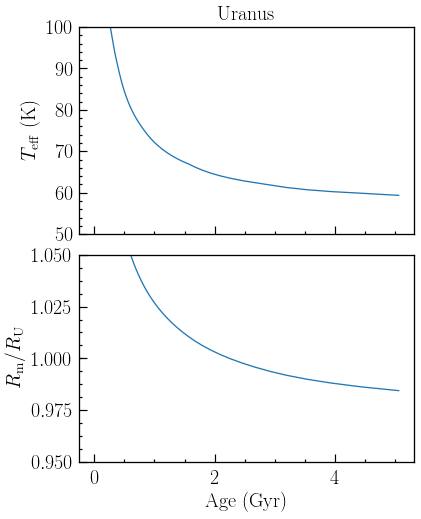

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'hspace':0.1}, sharex=True)

ax[0].plot(h['age'], h['teff'])
ax[1].plot(h['age'], h['radius'] / const.uranus_rvol)

ax[0].set_ylabel(r'$T_{\rm eff}\ (\rm K)$')
ax[1].set_ylabel(r'$R_{\rm m}/R_{\rm U}$')

ax[-1].set_xlabel(r'${\rm Age}\ ({\rm Gyr})$')

ax[0].set_ylim(50, 100)
ax[1].set_ylim(0.95, 1.05)
ax[0].set_title('Uranus')

# Neptune

                                  neptune                model                ratio
                mass            17.136236            17.136236             1.000000
              radius           2.4622e+09          2.45809e+09             1.001670
               gsurf          1127.456624          1131.225715             0.996668



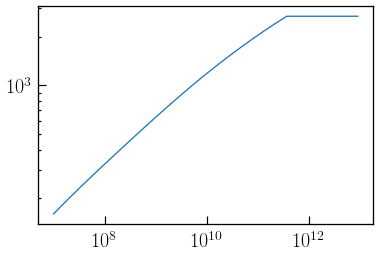

In [31]:
'''rough static model for present-day neptune'''

import ongp; reload(ongp) # reload to catch any changes to the module

mn = const.neptune_mass / const.mearth
rn = const.neptune_rvol
gn = const.cgrav * const.neptune_mass / const.neptune_rvol ** 2

g = ongp.evol(z_eos_option='reos water', atm_option='f11_tables n')
g.static(mtot='n', mcore=15, zenv=0.35, t10=160.)

print '%20s %20s %20s %20s' % ('', 'neptune', 'model', 'ratio')
print '%20s %20f %20f %20f' % ('mass', mn, g.mtot / const.mearth, mn / g.mtot * const.mearth)
print '%20s %20g %20g %20f' % ('radius', rn, g.rtot, rn / g.rtot)
print '%20s %20f %20f %20f' % ('gsurf', gn, g.surface_g, gn / g.surface_g)
print 

plt.loglog(g.p, g.t)


In [79]:
import ongp
reload(ongp)
n = ongp.evol(z_eos_option='reos water', atm_option='f11_tables n')
hn = n.run(mtot='n', mcore=15., zenv=0.35, start_t=840., nsteps=100, end_t=160., which_t='t10', include_core_entropy=True)

        step        iters           t1          t10         teff       radius       s_mean        dt_yr      age_gyr  nz_gradient     nz_shell       y_surf     walltime 
           0           23       -1.000      840.000      190.082    3.333e+09       42.245    0.000e+00        0.000            0            0        0.270        0.256
           1           23       -1.000      826.047      188.184    3.314e+09       42.234    1.914e+06        0.002            0            0        0.270        0.515
           2           22       -1.000      812.326      186.313    3.296e+09       42.224    2.013e+06        0.004            0            0        0.270        0.759
           3           22       -1.000      798.834      184.418    3.278e+09       42.213    2.095e+06        0.006            0            0        0.270        0.997
           4           22       -1.000      785.565      182.546    3.260e+09       42.202    2.190e+06        0.008            0            0        0.27

Text(0.5,1,'Neptune')

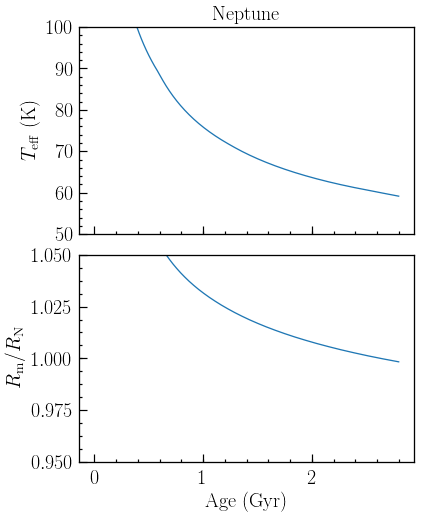

In [80]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'hspace':0.1}, sharex=True)

ax[0].plot(hn['age'], hn['teff'])
ax[1].plot(hn['age'], hn['radius'] / const.neptune_rvol)

ax[0].set_ylabel(r'$T_{\rm eff}\ (\rm K)$')
ax[1].set_ylabel(r'$R_{\rm m}/R_{\rm N}$')

ax[-1].set_xlabel(r'${\rm Age}\ ({\rm Gyr})$')

ax[0].set_ylim(50, 100)
ax[1].set_ylim(0.95, 1.05)
ax[0].set_title('Neptune')

In [130]:
'''instead of huge core, attempt to get a three-layer model like Fortney & Nettelmann 2010; Fortney et al. 2011'''

import ongp; reload(ongp) # reload to catch any changes to the module

mn = const.neptune_mass / const.mearth
rn = const.neptune_rvol
gn = const.cgrav * const.neptune_mass / const.neptune_rvol ** 2

planet = ongp.evol(z_eos_option='reos water', atm_option='f11_tables n')
planet.static(mtot='n', mcore=2.85, zenv=0.3, zenv_inner=0.852, t10=160., transition_pressure=0.1)

print '%20s %20s %20s %20s' % ('', 'neptune', 'model', 'ratio')
print '%20s %20f %20f %20f' % ('mass', mn, planet.mtot / const.mearth, mn / planet.mtot * const.mearth)
print '%20s %20g %20g %20f' % ('radius', rn, planet.rtot, rn / planet.rtot)
print '%20s %20f %20f %20f' % ('gsurf', gn, planet.surface_g, gn / planet.surface_g)
print 

plt.loglog(planet.p, planet.t)


286 nans in grada for iteration 4, stopping
saved problematic logp, logt, y to grada_nans.dat


EOSError: 286 nans in grada after eos call on static iteration 4.

(1000.0, 10000.0)

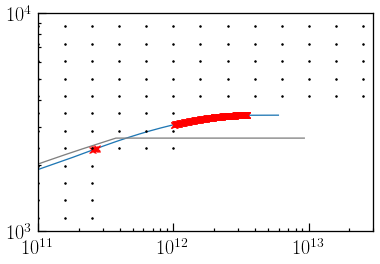

In [142]:
plt.plot(planet.p, planet.t)
plt.plot(g.p, g.t, color='grey')
logp, logt, y = np.genfromtxt('grada_nans.dat', unpack=True)
plt.plot(10**logp, 10**logt, 'rx')
plt.loglog()

import scvh; reload(scvh)
eos = scvh.eos('data')
eos.plot_pt_coverage(color='k', markersize=3)

plt.xlim(1e11, 3e13)
plt.ylim(1e3, 1e4)

# H/He grada as total grada probably bad assumption. Get correct X-Y-Z grada?

In [2]:
import ongp; reload(ongp)
j = ongp.evol(atm_option='f11_tables jup')
j.static(mtot='jup', t1=165., yenv=0.27)

(7393236366.164773, 165.0, 123.58029911066947)

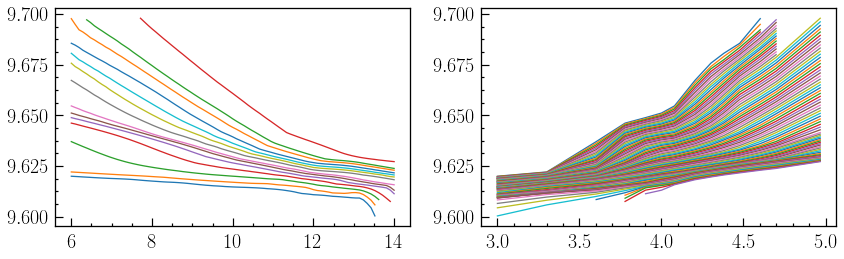

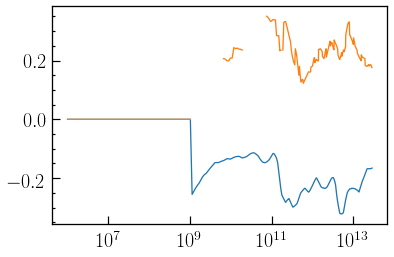

In [19]:
import scvh
xy = scvh.eos('data')

import reos; reload(reos)
z = reos.eos('data')

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
for logp in z.logpvals:
    ax[1].plot(z.logtvals, z.get_logs(logp, z.logtvals))
for logt in z.logtvals:
    ax[0].plot(z.logpvals, z.get_logs(z.logpvals, logt))
    
plt.figure()
grada = np.array([])
grada_ = np.array([])
for p, t in zip(j.p, j.t):
    logp = np.log10(p)
    logt = np.log10(t)
    try:
        num = z.get_dlogs_dlogp_const_t(logp, logt, f=1e-1)
        den = z.get_dlogs_dlogt_const_p(logp, logt, f=1e-1)
        ans = num / den
    except:
        ans = 0.
    grada = np.append(grada, ans)
    
    try:
        ans = z.get_grada(logp, logt)
    except:
        ans = 0.
    grada_ = np.append(grada_, ans)

plt.semilogx(j.p, grada)
plt.semilogx(j.p, grada_)

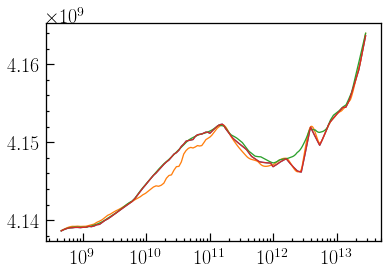

In [40]:
import scipy.interpolate
#    griddata
#    LinearNDInterpolator
#    NearestNDInterpolator
#    CloughTocher2DInterpolator
#    Rbf
#    interp2d

import reos_rhot
_ = reos_rhot.eos()
logp = np.log10(_.data['p'])
logt = np.log10(_.data['t'])
logs = np.log10(_.data['s'])

a = scipy.interpolate.LinearNDInterpolator(np.array([logp, logt]).T, logs)
b = scipy.interpolate.CloughTocher2DInterpolator(np.array([logp, logt]).T, logs)

# 'multiquadric': sqrt((r/self.epsilon)**2 + 1)
# 'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
# 'gaussian': exp(-(r/self.epsilon)**2)
# 'linear': r
# 'cubic': r**3
# 'quintic': r**5
# 'thin_plate': r**2 * log(r)

# c = scipy.interpolate.Rbf(logp, logt, logs)
# d = scipy.interpolate.Rbf(logp, logt, logs, function='gaussian')
# e = scipy.interpolate.Rbf(logp, logt, logs, function='linear')

# c = scipy.interpolate.interp2d(_.data['p'], _.data['t'], _.data['s'], kind='linear')
# d = scipy.interpolate.interp2d(_.data['p'], _.data['t'], _.data['s'], kind='cubic')
# e = scipy.interpolate.interp2d(_.data['p'], _.data['t'], _.data['s'], kind='quintic')

# see what the entropy values are along a jupiter H/He adiabat
   
plt.semilogx(j.p, 10**a(np.log10(j.p), np.log10(j.t)))
plt.semilogx(j.p, 10**b(np.log10(j.p), np.log10(j.t)))

import reos; reload(reos)
__ = reos.eos('data')
plt.semilogx(j.p[j.t>1e3], 10**__.get_logs(np.log10(j.p[j.t>1e3]), np.log10(j.t[j.t>1e3])))

import reos_v2; reload(reos_v2)
___ = reos_v2.eos()
plt.semilogx(j.p[j.t>1e3], 10**___.get_logs(np.log10(j.p[j.t>1e3]), np.log10(j.t[j.t>1e3])))


In [47]:
import time
import ongp; reload(ongp)
et = 0.
n = 3
for i in np.arange(n):
    t0 = time.time()
    e = ongp.evol()
    e.static(t1=165.)
    dt = time.time() - t0
    et += dt
    print(dt)
print('--------------')
print(et / n)

1.67484998703
1.66274309158
1.65793895721
--------------
1.66517734528


In [58]:
import time
import ongp; reload(ongp)
et = 0.
n = 3
for i in np.arange(n):
    t0 = time.time()
    f = ongp.evol(z_eos_option='reos water v2')
    f.static(t1=165.)
    dt = time.time() - t0
    et += dt
    print(dt)
print('--------------')
print(et / n)

1.71100187302
1.70746397972
1.7328338623
--------------
1.71709990501


In [ ]:
# reos v2 works. 
# write a function that takes logp, logt, y, z and return total entropy of the mixture. 
# take finite difference of that to calculate grada.

(-0.5, 1573.5, 1177.5, -0.5)

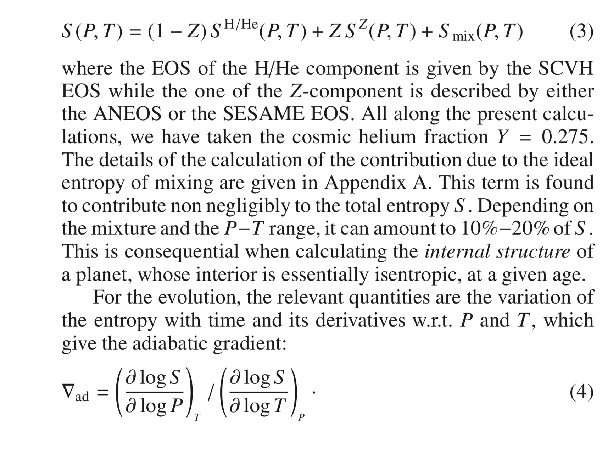

In [63]:
import matplotlib.image as mpimg
img = mpimg.imread('grada.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.gca().axis('off')